In [13]:
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  
import torch  

In [3]:
train_dataset = datasets.MNIST(root='C:/Users/roboc/OneDrive/Desktop/New folder (2)/New folder', train=True,  download=True,transform=ToTensor())
test_dataset = datasets.MNIST(root='C:/Users/roboc/OneDrive/Desktop/New folder (2)/New folder', train=False,  download=True,transform=ToTensor())

In [7]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:/Users/roboc/OneDrive/Desktop/New folder (2)/New folder
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [10]:
from torch.utils.data import DataLoader
loaders = {
    'train': DataLoader(train_dataset, 
                        batch_size=100, 
                        shuffle=True,
                        num_workers=1),
    'test': DataLoader(test_dataset, 
                       batch_size=100, 
                       shuffle=True,
                       num_workers=1)
}

In [14]:
#  Creating the neural network

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 =  nn.Linear(50,10)
    
    def forward(self, x):
        x= F.relu(F.max_pool2d(self.conv1(x),2))
        x= F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x=x.view(-1,320)
        x= F.relu(self.fc1(x))
        x= F.dropout(x, training=self.training)
        x=self.fc2(x)
        return F.softmax(x)

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [17]:
# Creating functions for training and testing

model = CNN().to(device)  # Creating the model
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Creating the optimizer
loss_fn = nn.CrossEntropyLoss()  # Creating the loss function
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data,target = data.to(device),target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 25 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(loaders['train'].dataset),
                100. * batch_idx / len(loaders['train']), loss.item()))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(loaders['test'].dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(loaders['test'].dataset),
        100. * correct / len(loaders['test'].dataset)))
    
for epoch in range(1, 11):
    train(epoch)
    test()


C:\Users\roboc\AppData\Local\Temp\ipykernel_6148\4231561469.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303921
Train Epoch: 1 [2500/60000 (4%)]	Loss: 2.225593
Train Epoch: 1 [5000/60000 (8%)]	Loss: 2.103435
Train Epoch: 1 [7500/60000 (12%)]	Loss: 1.886424
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.843193
Train Epoch: 1 [12500/60000 (21%)]	Loss: 1.778751
Train Epoch: 1 [15000/60000 (25%)]	Loss: 1.772639
Train Epoch: 1 [17500/60000 (29%)]	Loss: 1.684545
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.698216
Train Epoch: 1 [22500/60000 (38%)]	Loss: 1.712685
Train Epoch: 1 [25000/60000 (42%)]	Loss: 1.710953
Train Epoch: 1 [27500/60000 (46%)]	Loss: 1.686043
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.692844
Train Epoch: 1 [32500/60000 (54%)]	Loss: 1.616654
Train Epoch: 1 [35000/60000 (58%)]	Loss: 1.601175
Train Epoch: 1 [37500/60000 (62%)]	Loss: 1.603380
Train Epoch: 1 [40000/60000 (67%)]	Loss: 1.632780
Train Epoch: 1 [42500/60000 (71%)]	Loss: 1.643232
Train Epoch: 1 [45000/60000 (75%)]	Loss: 1.637012
Train Epoch: 1 [47500/60000 (79%)]	Loss: 1.599263
Train Epoc

In [18]:
device

device(type='cuda')

predictions 4


C:\Users\roboc\AppData\Local\Temp\ipykernel_6148\4231561469.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


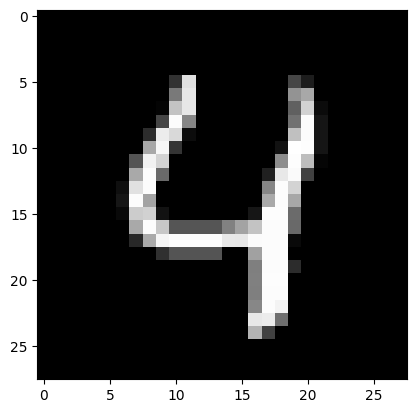

In [28]:
# Predictions

import matplotlib.pyplot as plt
model.eval()
data,target = test_dataset[4]
data = data.unsqueeze(0).to(device)
output = model(data)
predictions = output.argmax(dim=1, keepdim=True).item()
print("predictions",predictions)
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()